# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных  
  -airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
  -balcony — число балконов  
  -ceiling_height — высота потолков (м)  
  -cityCenters_nearest — расстояние до центра города (м)  
  -days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
  -first_day_exposition — дата публикации  
  -floor — этаж  
  -floors_total — всего этажей в доме  
  -is_apartment — апартаменты (булев тип)  
  -kitchen_area — площадь кухни в квадратных метрах (м²)  
  -last_price — цена на момент снятия с публикации  
  -living_area — жилая площадь в квадратных метрах(м²)  
  -locality_name — название населённого пункта   
  -open_plan — свободная планировка (булев тип)  
  -parks_around3000 — число парков в радиусе 3 км  
  -parks_nearest — расстояние до ближайшего парка (м)  
  -ponds_around3000 — число водоёмов в радиусе 3 км  
  -ponds_nearest — расстояние до ближайшего водоёма (м)  
  -rooms — число комнат  
  -studio — квартира-студия (булев тип)  
  -total_area — площадь квартиры в квадратных метрах (м²)  
  -total_images — число фотографий квартиры в объявлении  
#### Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод    
Колонки датафрейма в исходном файле были разделены символом табуляции.  
Понадобится заполнение пропущенных значений и приведение типов данных.  
В датасете наблюдаются аномальные величины в колонках: "высота потолков", "количество комнат"  
Датафрейм не содержит дубликатов.  


#### Возможные причины пропущенных значений:  
    - days_exposition - скорее всего данные квартиры не были реализованы. Для последующего анализа их придется отбросить.  
    - ponds_nearest, ponds_around3000, parks_nearest, parks_around3000  - Можно предположить, что данные в этих колонках
    пропущены, т.к. поблизости нет парков или прудов. Данные не понадобятся для анализа так, что их можно не трогать.  
    - airports_nearest - Возможно, данный параметр не показался важным для людей, продающих квартиру.  
    - locality_name - скорее всего случайные пропуски.  
    - balcony - т.к. количество не указано, скорее всего в данной квартире нет балконов.  
    - is_apartment - не указанный параметр, скорее всего указывает на то, что квартира не является аппартаментами.  
    - floors_total - скорее всего случайные пропуски.  
    - ceiling_height - Возможно, данный параметр не показался важным для людей, продающих квартиру.
    - living_area, kitchen_area - скорее всего ошибка вызвана тем, что в объявлении указали только общую площадь  

### Шаг 2. Предобработка данных

In [4]:
# Приводим колонку цена к целочисленному формату
estate['last_price'] = estate['last_price'].astype('int')

In [5]:
# Приводим колонку "дата публикации" к формату даты
estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'], format='%Y-%m-%d')

In [6]:
# Пропущенные значения в колонке days_exposition помечаем как еще не проданные 
# Приводим колонку к целочисленному формату

estate['days_exposition'] = pd.to_numeric(estate['days_exposition']).fillna(-1).astype('int')


### Комментарий к комментарию:  
Заполним пропуски в днях продажи -1, в качестве маркера 

In [7]:
# Заполняем пропущенные значения в колонке "balcony" и приводим её к целочисленному формату
estate['balcony'] = (estate['balcony'].fillna(0)).astype('int')

In [8]:
# Приводим колонку floors_total к целочисленному формату
estate["floors_total"] = estate["floors_total"].astype('Int64')

In [9]:
# Заполняем пропущенные значения в колонки 'is_apartment' значением False
estate['is_apartment'] = estate['is_apartment'].fillna(False)

In [10]:
# Заполняем пропущенные значения в колонках 'kitchen_area' и 'living_area' для квартир-студий
estate.loc[estate['studio'] == True, ['living_area']] = estate['total_area']
estate.loc[estate['studio'] == True, ['kitchen_area']] = 0
# Для квартир не-студий значения площади кухни и жилой площади будут рассчитаны в Шаге 3

In [11]:
# Заполняем пропущенные значения в колонке 'ceiling_height' используя предыдущие валидные значения
estate['ceiling_height'] = estate['ceiling_height'].fillna(method='ffill')

In [12]:
# Приводим колонку airports_nearest к целочисленному формату
estate['airports_nearest'] = estate['airports_nearest'].astype('Int64')

In [13]:
# Заполняем пропущенные значения в колонках parks_around3000, ponds_around3000, 
# и приводим колонки к целочисленному формату
estate['parks_around3000'] = estate['parks_around3000'].fillna(0).astype('int')
estate['ponds_around3000'] = estate['ponds_around3000'].fillna(0).astype('int')
estate['parks_nearest'] = estate['parks_nearest'].astype('Int64')
estate['ponds_nearest'] = estate['ponds_nearest'].astype('Int64')

In [14]:
# Заполняем пропущенные значения в колонках cityCenters_nearest и приводим колонки к целочисленному формату
estate['cityCenters_nearest'] = pd.to_numeric(estate['cityCenters_nearest']).astype('Int64')

In [15]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null Int64
living_area             21806 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21570 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null Int64
ponds_around3000      

### Вывод:  
    1) Привод значения колонки "цена" к целочисленному формату, т.к. цена указана полностью и доли рубля не сыграют в 
    анализе роли  
    2) Для удобства операций приводено значения колонки "дата публикации" к формату datetime  
    3) Колонка 'days_exposition' Т.к. количество дней от публикации до снятия отсутствует, можем предположить, что эти объявления еще не сняты с реализации, соответственно заполняем эти пропуски -1, чтобы можно было отбросить эти даные при анализе проданных квартир, и приводим полученное значение к целочисленному формату, т.к. для анализа нам не нужны десятые и сотые доли дня.  
    4) В колонке "количество балконов" пропщенные значения заполняем нулями, т.к. скорее всего, пропуски обусловлены тем, что балкона в квартире нет. Колонку приводим к целочисленному значению, т.к. часть балкона невозможна.
    5) Колонку "всего этажей" привели к целочисленному формату. Доли этажей нам не понадобятся.
    6) В Колонке "аппартаменты" пропущенные значения считаем как False, т.к. этот параметр выглядит обязательным для владельцев аппартаментов, для остальных же продавцов это незначительный параметр.
    7) В квартирах со значением True в колонке studio ставим площадь кухни 0 кв.м, а жилую площадь приравниваем к общей.  
    8) В колонке "высота потолков" пропущенные значения заполняем -1, чтобы можно было отфильтровать эти значения в дальнейшем и избежать искажения реальных данных  
    9) Меняем формат колонки "расстояние до аэропорта"  на целочиленный, т.к. доли метров не сыграют роли для анализа     
    10) Пропущенные значения в колонках "число парков в радиусе 3 км",  "число водоёмов в радиусе 3 км", заменяем нулями, предполагая, что если данная информация не указана, то указанных объектов в радиусе нет. Формат приводим к целочисленному.
    11) Формат в колонках "расстояние до ближайшего парка", "расстояние до ближайшего водоёма"  приводим к целочисленному.
    12) Формат значений в столбце "расстояние до центра города" меняем на  целочисленный.


### Шаг 3. Посчитайте и добавьте в таблицу

In [16]:
# Добавляем колонку цены за квадратный метр.
estate['price_per_meter'] = (estate['last_price']/estate['total_area']).astype('int')
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,-1,120370
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82920
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


In [17]:
# Добавляем в таблицу день недели, месяц и год публикации объявления;
estate['weekday'] = pd.DatetimeIndex(estate['first_day_exposition']).weekday
estate['month'] = pd.DatetimeIndex(estate['first_day_exposition']).month
estate['year'] = pd.DatetimeIndex(estate['first_day_exposition']).year

In [18]:
# Добавляем функцию выбирающую вариант этажа квартиры
def appartment_floor(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
# Используя функцию добавляем данные о варианте этажа   
estate["appartment_floor"] = estate.apply(appartment_floor, axis=1)
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,appartment_floor
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482,2,755,-1,120370,3,3,2019,Другой
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,0,NaN,0,NaN,81,82920,1,12,2018,Первый
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,1,90,2,574,558,92785,3,8,2015,Другой
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,False,...,2,84,3,234,424,408176,4,7,2015,Другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2,112,1,48,121,100000,1,6,2018,Другой


In [19]:
# Добавляем колонки соотношение жилой и общей площади, а также отношение площади кухни к общей.
estate['living_to_total'] = np.around(estate['living_area']/estate['total_area'], 2)
estate['kitchen_to_total'] = np.around(estate['kitchen_area']/estate['total_area'], 2)
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,appartment_floor,living_to_total,kitchen_to_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,-1,120370,3,3,2019,Другой,0.47,0.23
1,7,3350000,40.4,2018-12-04,1,2.70,11,18.6,1,False,...,0,NaN,81,82920,1,12,2018,Первый,0.46,0.27
2,10,5196000,56.0,2015-08-20,2,2.70,5,34.3,4,False,...,2,574,558,92785,3,8,2015,Другой,0.61,0.15
3,0,64900000,159.0,2015-07-24,3,2.70,14,NaN,9,False,...,3,234,424,408176,4,7,2015,Другой,NaN,NaN
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000,1,6,2018,Другой,0.32,0.41


In [20]:
# Находим медианные коэффициенты для кухонной и жилой площади
median_kitchen_coef = estate['kitchen_to_total'].median().round(3)
median_living_coef = estate['living_to_total'].median().round(3)

In [21]:
# Заполняем пропущенные значения для кухонной и жилой площади
estate.loc[estate['kitchen_area'].isna(), 'kitchen_area'] = estate['total_area']*median_kitchen_coef
estate.loc[estate['living_area'].isna(), 'living_area'] = estate['total_area']*median_living_coef

In [22]:
estate.query('living_area.isna() or kitchen_area.isna()')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,appartment_floor,living_to_total,kitchen_to_total


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

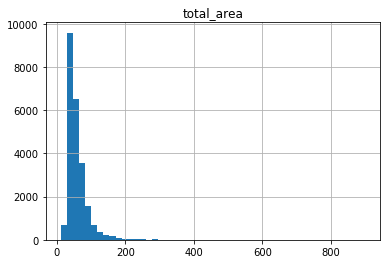

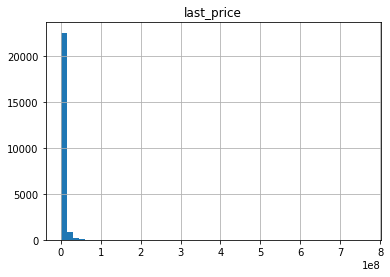

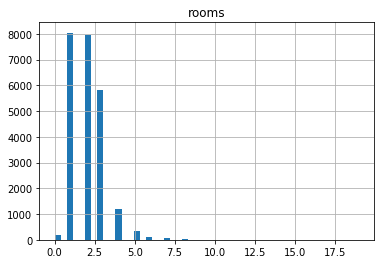

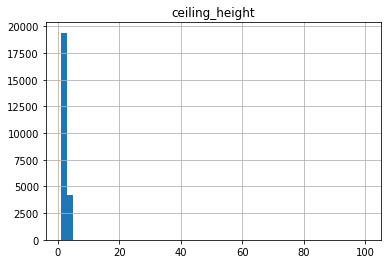

In [23]:
# Строим гистограммы для параметров площадь, цена, число комнат, высота потолков
params = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for param in params:
    estate[param].hist(grid=True, bins=50).set_title(param)
    plt.show()


### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?


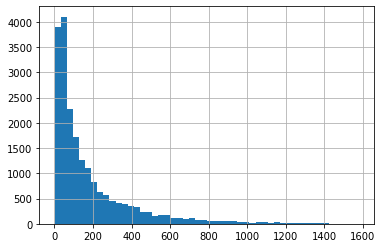

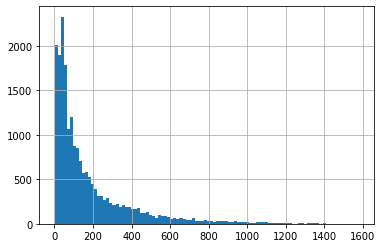

In [24]:
# Строим гистограммы по дням продажи
estate.query('days_exposition != -1')['days_exposition'].hist(bins=50)
plt.show()
# Сравниваем с гистограммой с большим количесвом корзин.
estate.query('days_exposition != -1')['days_exposition'].hist(bins=100)


In [25]:
# Проверяем описание данных по количеству дней продажи в таблице
estate.query('days_exposition != -1')['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Вывод:  
    - В среднем квартира продается за полгода, однако медиана больше среднего значения практически в 2 раза, что скорее всего связано с хвостом квартир, продававшихся очень долго.  
    - Учитывая показатели гистограмм и описания датафрейма, можно сделать вывод, что продажу квартиры можно считать очень долгой, если она продавалась более 450 дней. Всплесков аномально коротких сроков продажи не замечено.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

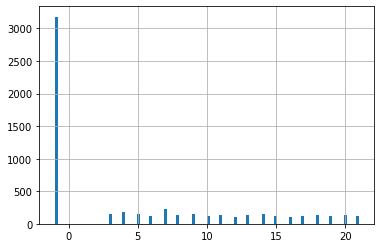

In [26]:
# Строим гистограмму отображения квартир, срок реализации которых менее 22 дней (граница 1го квартиля)
estate.query('days_exposition < 22')['days_exposition'].hist(bins=100)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f97df46d7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f97df482e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f97df46d790>],
 'medians': [<matplotlib.lines.Line2D at 0x7f97e1858910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f97e1858e10>],
 'means': []}

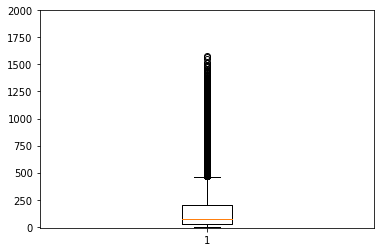

In [27]:
# Строим ящик с усами для просмотра верхней и нижней границ
plt.ylim(-10, 2000)
plt.boxplot(estate['days_exposition'])

In [1]:
plt.ylim(-10, 460)
plt.boxplot(estate['days_exposition']);

NameError: name 'plt' is not defined

In [29]:
estate['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f97df3fc310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f97df3dd910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f97df3fc2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f97df3fcf90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f97df3dc890>],
 'means': []}

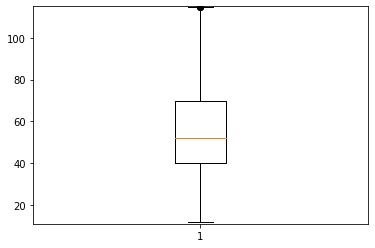

In [30]:
plt.ylim(11, 115)
plt.boxplot(estate['total_area'])

In [31]:
estate['last_price'].describe().astype('int')

count        23699
mean       6541548
std       10887013
min          12190
25%        3400000
50%        4650000
75%        6800000
max      763000000
Name: last_price, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f97e1d60bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f97df410610>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f97e1d60b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f97e1e5fbd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f97e1e3de10>],
 'means': []}

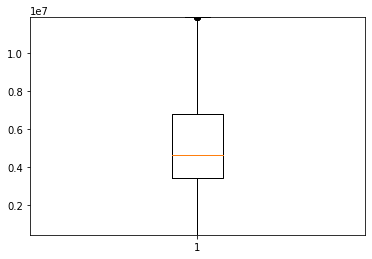

In [32]:
plt.ylim(430000, 11900000)
plt.boxplot(estate['last_price'])

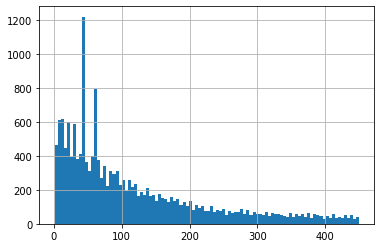

In [101]:
# Создаем новую таблицу с чистыми данными для анализа
good_data = estate.query(
    '(days_exposition >= 0 and days_exposition <= 450) and (12 <= total_area <= 115) and (430_000 <= last_price <= 11_900_000)')
good_data['days_exposition'].hist(bins=100)

In [102]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17098 entries, 1 to 23695
Data columns (total 29 columns):
total_images            17098 non-null int64
last_price              17098 non-null int64
total_area              17098 non-null float64
first_day_exposition    17098 non-null datetime64[ns]
rooms                   17098 non-null int64
ceiling_height          17098 non-null float64
floors_total            17037 non-null Int64
living_area             17098 non-null float64
floor                   17098 non-null int64
is_apartment            17098 non-null bool
studio                  17098 non-null bool
open_plan               17098 non-null bool
kitchen_area            17098 non-null float64
balcony                 17098 non-null int64
locality_name           17063 non-null object
airports_nearest        12902 non-null Int64
cityCenters_nearest     12915 non-null Int64
parks_around3000        17098 non-null int64
parks_nearest           5273 non-null Int64
ponds_around3000      

###  Вывод:  
    - Срок реализации: Нижний ус упирается в -1 это квартиры, которые не были проданы и пропущенные значения в 'days_exposition' были заменены на -1. Верхний ус заканчивается около 450 дней. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Более высокие значения рисуются отдельными точками, но сливаются в единую жирную линию: таких выбросов у нас очень много. Медиана же стремится к нижнему краю ящика с усами.  
    - Общая площадь: Нижний ус упирается в 12 - минимальные значения выборки. Верхний ус указывает на площадь 115 кв.м. Большое количество выбрасов после верхней границы. Медиана чуть ниже середины диаграммы размаха.  
    - Цена квартиры: Граница нижнего уса уходит в зону отрицательных значений из-за большого межквартильного размаха. Нижнюю границу отметим в 430_000 руб, ниже этого только квартира со стоимостью 12190 - явная ошибка в записи. Граница верхнего уса - 11_900_000 рублей. Остальные значения выбросим.  
    
Отфильтрованные данные поместим в отдельный датафрейм, с которым продолжим дальнейшую работу.

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

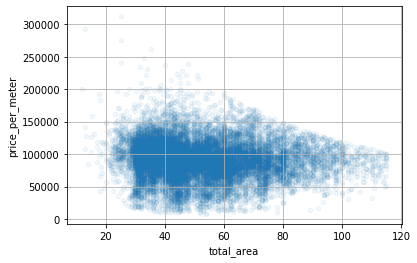

In [69]:
# Строим график рассеивания зависимости цены квадратного метра от площади квартиры
good_data.plot(x='total_area', y='price_per_meter',  kind='scatter',grid=True, alpha=0.06, figsize=(6, 4))

In [100]:
# Рассчитываем корреляцию цены от общей площади
good_data['price_per_meter'].corr(good_data['total_area']).round(2)

-0.08

In [89]:
# Делаем обратный расчет корреляции
good_data['total_area'].corr(good_data['price_per_meter']).round(2)

-0.08

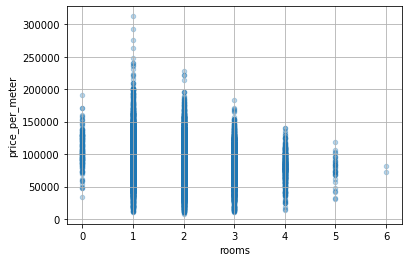

In [72]:
# Строим график рассеивания зависимости цены от числа комнат
good_data.plot(x='rooms', y='price_per_meter', kind='scatter', grid=True, alpha=0.3)

In [91]:
# Рассчитываем корреляцию цены от количества комнат
good_data['price_per_meter'].corr(good_data['rooms']).round(2)

-0.23

In [92]:
# Делаем обратный расчет корреляции
good_data['rooms'].corr(good_data['price_per_meter']).round(2)

-0.23

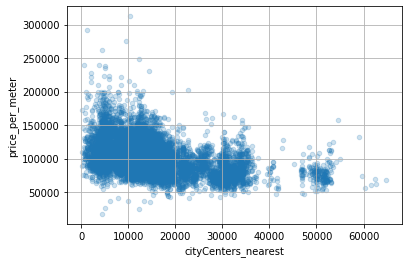

In [103]:
# Строим график рассеивания зависимости цены от удаленности от центра
good_data.plot(x='cityCenters_nearest', y='price_per_meter',  kind='scatter',grid=True, alpha=0.22)

In [94]:
# Рассчитываем корреляцию цены от удаленности от центра
good_data['last_price'].corr(good_data['cityCenters_nearest'].astype('float64')).round(2)

-0.34

In [95]:
# Делаем обратный расчет корреляции
(good_data['cityCenters_nearest'].astype('float64')).corr(good_data['last_price']).round(2)

-0.34

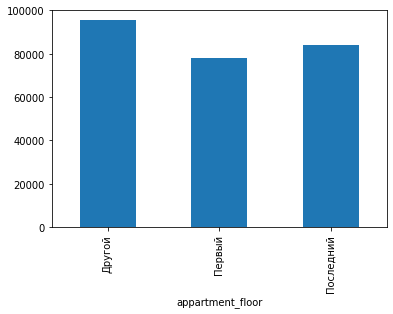

In [84]:
# Строим график зависимости цены от удаленности этажа
floors = good_data.pivot_table(index='appartment_floor', values='price_per_meter')
floors['price_per_meter'].plot(kind='bar')

In [44]:
# изучаем зависимость цены от даты размещения: дня недели, месяца и года

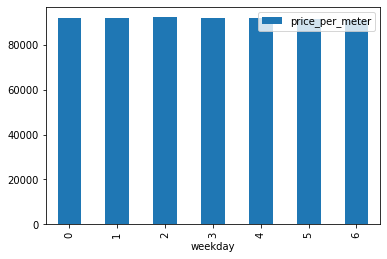

In [85]:
# строим график зависимости цены от дня недели
good_data.pivot_table(index='weekday', values='price_per_meter').plot(kind='bar')

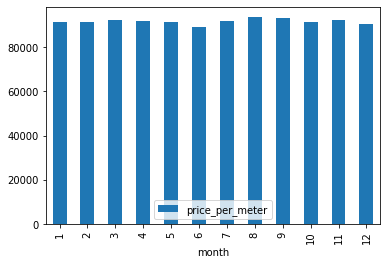

In [86]:
# строим график зависимости цены от месяца
good_data.pivot_table(index='month', values='price_per_meter').plot(kind='bar')

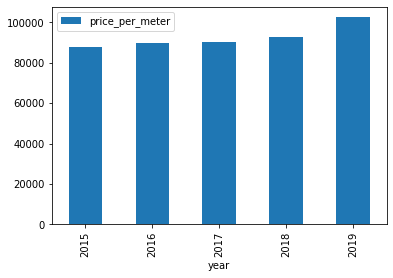

In [87]:
# строим график зависимости цены от года
good_data.pivot_table(index='year', values='price_per_meter').plot(kind='bar')

### Вывод:  
    1) Зависимость цены квадратного метра от площади квартиры:  Цены за квадратный метр в маленьких квартирах выше, чем в больших. На графике видно, что основной кластер квартир в диапазоне от 50 до 150 тысяч за квадратный метр, при площади от 30 до 80 кв.метров. Коэффициент корреляции говорит о том же - чем меньше квартира по площади, тем дороже цена за кв.м.  
    2) Зависимость цены квадратного метра от числа комнат: Гипотеза из п.1. подтверждается показаниями графика: цены квадратного метра в однокомнатых квартирах намного выше чем у всех остальных. Коэффициент корреляции говорит о том же - чем меньше в квартире комнат, тем дороже цена за кв.м.    
    3) Зависимость цены квадратного метра от удаленности от центра: График распределения показывает, что выше всего ценятся квартиры в радиусе 8 км от центра, но большая часть квартир в центре по цене примерно равна квартирам на отдалении от центра. Очевидно дело здесь в том, что близость к центру областного города не играет большой роли, решающим фактором для этого показателя будет расстояние до центра Петербурга.  
    4) Зависимость цены квадратного метра от удаленности этажа: меньше всего ценится жилье на первом этаже, немного выше цена за квадратный метр у квартир на верхнем этаже. Самая высокая цена за кв.м. у квартир, которые выше первого, но ниже последнего.   
    5) Зависимость цены квадратного метра от даты размещения (дня недели, месяца и года):  
        - от дня недели: Явных выделений по цене нет.  
        - от месяца: Снижение цены за квадратный метр в июне.
        - от года: Прослеживается тенденция на небольшой рост цен с 2015 по 2018 гг, после чего в 2019 году был резкий скачок цен.

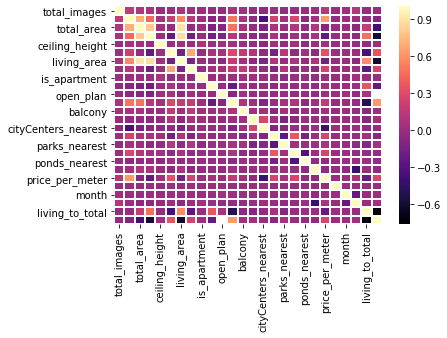

In [104]:
# Строим тепловую диаграмму корреляции
sns.heatmap(good_data.corr(),cmap='magma',linecolor='white',linewidths=1)

### Вывод после анализа тепловой карты:  
Основные факторы, влияющие на цену за квадратный метр:  
    - Общая площадь;  
    - Близость к центру;
Чем вышеуказанные параметры меньше, тем выше цена за кв.м  
    - Высота потолков;  
    - Жилая площадь;  
Чем вышеуказанные параметры больше, тем выше цена за кв.м.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [48]:
# Выделяем 10 городов с наибольшим количеством объявлений
cities = good_data['locality_name'].value_counts().head(10).index.values

In [49]:
# Считаем среднюю цену квадратного метра, округляем до 2 цифр после запятой, добавляем данные в словарь
city_dict = {}
for city in cities:
    city_dict[city] = good_data.query('locality_name == @city')['price_per_meter'].mean().round(2)

In [50]:
# Делаем новый датафрейм на основе получившегося словаря
city_df = pd.DataFrame(index=city_dict.keys(), data=city_dict.values())
city_df.columns = ['price']
city_df.sort_values(by='price', ascending=False)

,price
Санкт-Петербург,104529.18
Пушкин,99451.79
деревня Кудрово,92602.38
посёлок Парголово,89265.36
посёлок Мурино,86090.28
посёлок Шушары,77962.83
Колпино,74544.88
Гатчина,68326.61
Всеволожск,66922.43
Выборг,57296.27


### Вывод  
    - Самая высокая стоимость жилья за квадратный метр в городе Санкт-Петербург;
    - Самая низкая в городе Выборг;

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [108]:
# Выделяем датафрейм с квартирами в Санкт-Петербурге
piter = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest >= 0')
# Добавляем столбец с расстоянием до центра в километрах
piter.loc[:,'distance_to_center_km'] = (piter['cityCenters_nearest']/1000).astype('int')

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


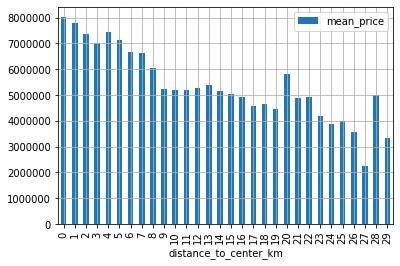

In [109]:
# Считаем среднюю цену для каждого километра от центра
piter_km = piter.pivot_table(index='distance_to_center_km', values='last_price', aggfunc='mean')
piter_km.columns = ['mean_price']
piter_km['mean_price'] = piter_km['mean_price'].astype('int')
piter_km.plot(kind='bar', grid=True)

### Вывод:  
    - На графике видно, что условной границей центра является расстояние в 8км


### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [53]:
# Выделяем сегмент квартир в центре Петербурга
piter_center = piter.query('distance_to_center_km <= 8')

In [54]:
# Анализируем параметр общей площади квартиры в центре Петербурга
piter_center['total_area'].value_counts().head(10)

43.0    36
60.0    35
31.0    32
45.0    32
72.0    31
46.0    30
42.0    28
70.0    25
55.0    24
50.0    24
Name: total_area, dtype: int64

In [55]:
piter_center['total_area'].describe()

count    2193.000000
mean       61.364350
std        20.636865
min        12.000000
25%        45.000000
50%        59.100000
75%        75.800000
max       115.000000
Name: total_area, dtype: float64

In [110]:
# Анализируем цены на квартиры в центре Петербурга
(piter_center['last_price'].describe()).astype('int')

count      2193
mean     116203
std       28350
min       17391
25%       95714
50%      111111
75%      132954
max      292307
Name: price_per_meter, dtype: int64

In [57]:
# Анализируем параметр количество комнат квартиры в центре Петербурга
piter_center['rooms'].value_counts()

2    869
3    591
1    542
4    157
0     18
5     15
6      1
Name: rooms, dtype: int64

In [58]:
# Анализируем параметр "высота потолков" квартиры в центре Петербурга
piter_center.query('ceiling_height >= 0')['ceiling_height'].value_counts().head(15)

2.50    352
3.00    303
2.70    177
2.80    158
2.60    135
2.75    117
3.20    111
2.55     83
2.65     76
3.10     73
2.90     58
3.30     49
3.50     47
3.40     28
2.85     21
Name: ceiling_height, dtype: int64

In [59]:
piter_center.query('ceiling_height >= 0').sort_values(by='ceiling_height', ascending=False)['ceiling_height']

20478    27.00
18545    25.00
5076     24.00
21227     5.80
12628     5.30
         ...  
22414     2.45
14349     2.40
13271     2.40
19330     2.00
20521     2.00
Name: ceiling_height, Length: 2193, dtype: float64

In [60]:
piter_center.query('ceiling_height >= 0')['ceiling_height'].describe()

count    2193.000000
mean        2.897975
std         0.898722
min         2.000000
25%         2.600000
50%         2.800000
75%         3.000000
max        27.000000
Name: ceiling_height, dtype: float64

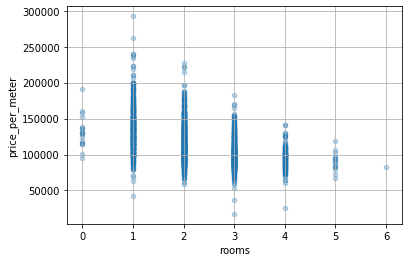

In [111]:
# Влияние числа комнат на цену за кв. метр
piter_center.plot(x='rooms', y='price_per_meter', kind='scatter', grid=True, alpha=0.3)

In [121]:
# Рассчет корреляции цены от количества комнат квартиры в центре Петербурга
piter_center['price_per_meter'].corr(piter_center['rooms'])

-0.4688493956328695

In [122]:
# Рассчет корреляции цены от количества комнат в общем датасете
good_data['price_per_meter'].corr(good_data['rooms'])

-0.2321850401437265

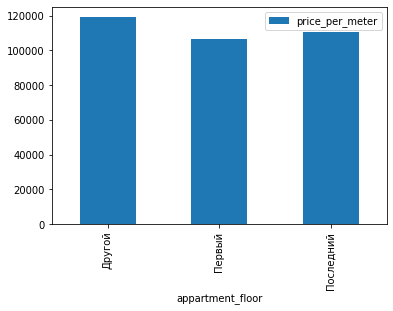

In [114]:
# Влияние высотности этажа на цену квартиры в центре Петербурга
piter_center.pivot_table(index='appartment_floor', values='price_per_meter').plot(kind='bar')

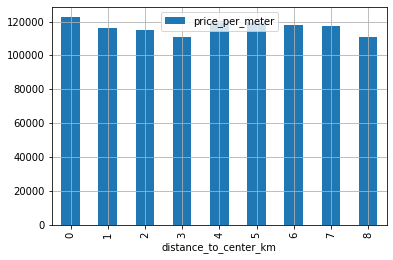

In [115]:
# Влияние удаленности от центра на цену квартиры в центре Петербурга
piter_center.pivot_table(index='distance_to_center_km', values='price_per_meter').plot(kind='bar', grid=True)

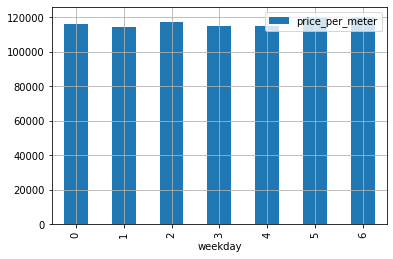

In [117]:
# строим график зависимости цены от дня недели
piter_center.pivot_table(index='weekday', values='price_per_meter').plot(kind='bar', grid=True)

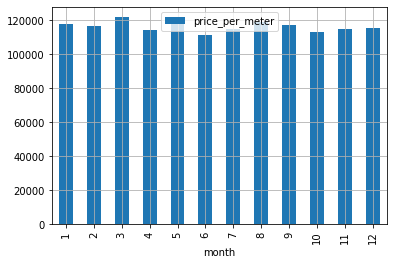

In [119]:
# строим график зависимости цены от месяца
piter_center.pivot_table(index='month', values='price_per_meter').plot(kind='bar', grid=True)

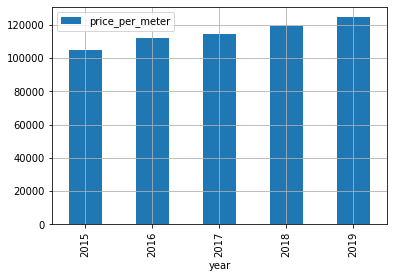

In [120]:
# строим график зависимости цены от года
piter_center.pivot_table(index='year', values='price_per_meter').plot(kind='bar', grid=True)

### Вывод:  
    1) Анализ параметры: площадь, цена, число комнат, высота потолков в центре Петербурга:  
        - Площадь: В целом площадь квартир не отличается от стандартной, но присутствуют также квартиры с очень большой площадью, скорее всего это бывшие коммунальные квартиры с объединенными комнатами.    
        - Цена: Медианная цена на квартиру в центре 8 млн. Большая часть квартир имеют цену до 13 млн., также существует кластер квартир с ценами в десятки и сотни миллионов.  
        - Число комнат: Больше всего 1, 2, и 3-комнатных квартир. Также встречаются квартиры с числом комнат более 10, что тоже скорее всего указывает на то, что это бывшие коммунальные квартиры.  
        - Высота потолков: Больше всего квартир с потолками до 3.2 метров, помимо этого встречаются квартиры с высотой потолков более 4 метров - вероятно они находятся в нетиповых домах старинной постройки.  
    2) Анализ влияния на цену за квадратный метр факторов: число комнат, этаж, удалённость от центра, дата размещения объявления и сравнение этих зависимостей с общими показателями:
        - Влияние числа комнат за квадратный метр: Сохраняется тенденция, что и в анализе обшего датасета. Цены за квадратный метр в однокомнатных квартирах выше, чем в больших. Коэффициент корреляции в центре Петербурга в 2 раза ниже - т.е. чем меньше площадь квартиры в центре Петербурга, тем выше цена за кв.м.  
        - Влияние этажа на цену квартиры: Также повторяется тенденция из анализа общего датасета - цены выше всего у средних этажей, самые дешевые квартиры на первых этажах, цена на последних этажах немного выше чем на первых.  
        - Влияние Удаленности от центра на цену квартиры: На графике явно прослеживается закономерность, что квартиры в радиусе до 2 км ценятся выше остальных.  
        - Влияние дня недели подачи объявления на цену: Общая тенденция сохраняется, цены в объявлениях, поданных в пятницу выше остальных.  
        - Влияние месяца подачи объявления на цену: По прежнему квартиры из апрельских и сентябрьских объявлений стоят дороже. Что скорее всего связано с активным туристическим сезоном перед началом мая, и началом учебного года в ВУЗах в сентябре
        - Влияние года подачи объявления на цену: Цены на квартиры Петербуржского центра тоже снижаются до 2018 года, после которого происходит подорожание, но в отличие от анализа общего датасета, 2016 и 2017 гг. примерно равны.


### Шаг 5. Общий вывод    
*В ходе работы было сделано*:    
    - Получен и проанализирован исходный датасет;  
    - Выявлены пропуски и описаны возможные пути их появления;  
    - Данные предобработаны: пропущенные данные были заменены на -1, чтобы при последующем анализе строки с пропущенными значениями можно было отфильтровывать.  
    - Вещественночисленные данные были приведены к целочисленному;  
    - После предобработки данных, были построены и проанализированы гистограммы выделенных факторов, которые могут повлиять на цену и срок реализации квартиры.  
    - С помощью диаграммы размаха были определены нижняя и верхняя граница сроков реализации, по данным границам был выделен набор данных для последующего анализа.  
    - Были построены графики зависимости цены квартиры от факторов: общей площади, числа комнат, удалённости от центра, высотности этажа, даты размещения.  
    - Были выделены 10 населённых пунктов с наибольшим числом объявлений. Посчитана средняя цена квадратного метра в этих населённых пунктах.  
    - Выделены населённые пункты с самой высокой и низкой стоимостью жилья - самая высокая в Санкт-Петербурге, самая низкая в Выборге.  
    - Выделены квартиры в Санкт-Петербурге. Выяснено, какая область входит в центр. Рассчитано расстояние до центра в километрах. Посчитна средняя цена для каждого километра. Построен график, показывающий как цена зависит от удалённости от центра. Определена граница - 8 км.  
    - Выделен сегмент квартир в центре. Территория проанализирована. Были изучены следующие параметры: площадь, цена, число комнат, высота потолков. Также было проведен анализ влияния на стоимость квартиры факторов: число комнат, этаж, удалённость от центра, дата размещения объявления. Полученный анализ показал, что общее влияние факторов на цену квартир в центре Петербурга мало отличается, и тенденции влияниях разнообразных факторов на цену жилья, выявленные при анализе общего датасета, сохраняются при анализе жилья в центре Петербурга.  
    
Общий вывод:  Анализ показал, что не существует одного решающего фактора, влияющего на цену квартиры и на срок её реализации. Квартиры в центре ценятся больше, но кто-то наоборот предпочитает жить подальше от. Явно выделяется предпочтение жилью на средних и верхних этажах. Цены в объявлениях, поданных в пятницу, выше чем в остальные дни. Объявления, сделанные перед началом летнего и учебного сезонов выше чем в другое время года. Цены на квартиры понемногу снижаются с каждым годом, что скорее всего связано с нестабильностью, вызванной экономическими санкциями, начавшимися в 2014г.
    